#Data Sources and Variables :

Variable names : 

1. Ladder score : or called the Happiness score. It is the national average response to the question of life evaluations. So the imagine of a ladder with 0 to 10 steps, 0 representing the worst  possible life and 10 the best possible life
2. GDP : Gross domestic product - monetary value of all finished goods and servies made within a country during a specific time period
3. Healthy Life Expectancy- based on data from the WHO Global Health Observatory data repository
4. Social Support - a person has family or friends they can  count on in times of trouble. Measured as Binary responses ( either 0 or 1). yes or no
5. Freedom to make life choices - this is the national average of responses to the GWP question , Are you satisfied or not with your freedom to choose what you do with your life
6. Generosity- resodial of regressing the national average of response to the GWP question : have you donated money to charity in the last month ?
7. Corruption Perception - measure of the national average of the survery responses to 2 questions - is corruption widespread through your government and 2nd businesses. Overall perception measured as an average of 0 or 1 responses. 


A recap of the outcomes outlined earlier in the document;
• How happiness is currently distributed globally
• The factors that may influence global happiness
• Whether any of the factors can predict happiness - the 2021 data is split into Test and training sets  and the model is trained on the training set and predictionss are made on the test set. These predictions are evaluated ( using metrics correlation , RMSE and MAE) and the null hypothesis ( that none of the factors influence happiness is either rejected or accepted. 

The first 3 of these are addressed using visualizations and the last outcome using a linear
regression and KNN



##1. Import Packages ##

In [29]:
# Numerical arrays.
import numpy as np

# Data frames.
import pandas as pd

# Plotting.
import matplotlib.pyplot as plt

# Logistic regression.
import sklearn.linear_model as lm

# K nearest neighbours.
import sklearn.neighbors as nei

# Helper functions.
import sklearn.model_selection as mod

# Fancier, statistical plots.
import seaborn as sns

In [30]:
# Standard plot size.
plt.rcParams['figure.figsize'] = (20, 20)

# Standard colour scheme.
plt.style.use('ggplot')

## 2. Read in the Dataset ##

In [31]:
# Load in the datasets Using pandas  - then check if the data works ok with the scikit learn
import warnings
warnings.filterwarnings('ignore') 

happiness = pd.read_csv(r'C:\Users\User\Desktop\repo\Machine-learning-and-Statistics\Happiness\Happiness 2021 2.csv')


In [32]:
# overview of the dataset
happiness

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.000,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.700,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.400,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.000,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.400,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,Lesotho,Sub-Saharan Africa,3.512,0.120,3.748,3.276,7.926,0.787,48.700,0.715,-0.131,0.915,2.43,0.451,0.731,0.007,0.405,0.103,0.015,1.800
145,Botswana,Sub-Saharan Africa,3.467,0.074,3.611,3.322,9.782,0.784,59.269,0.824,-0.246,0.801,2.43,1.099,0.724,0.340,0.539,0.027,0.088,0.648
146,Rwanda,Sub-Saharan Africa,3.415,0.068,3.548,3.282,7.676,0.552,61.400,0.897,0.061,0.167,2.43,0.364,0.202,0.407,0.627,0.227,0.493,1.095
147,Zimbabwe,Sub-Saharan Africa,3.145,0.058,3.259,3.030,7.943,0.750,56.201,0.677,-0.047,0.821,2.43,0.457,0.649,0.243,0.359,0.157,0.075,1.205


In [33]:
# Summary statistics.
happiness.describe()

,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,1.490000e+02,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.532839,0.058752,5.648007,5.417631,9.432208,0.814745,64.992799,0.791597,-0.015134,0.727450,2.430000e+00,0.977161,0.793315,0.520161,0.498711,0.178047,0.135141,2.430329
std,1.073924,0.022001,1.054330,1.094879,1.158601,0.114889,6.762043,0.113332,0.150657,0.179226,5.347044e-15,0.404740,0.258871,0.213019,0.137888,0.098270,0.114361,0.537645
min,2.523000,0.026000,2.596000,2.449000,6.635000,0.463000,48.478000,0.382000,-0.288000,0.082000,2.430000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.648000
25%,4.852000,0.043000,4.991000,4.706000,8.541000,0.750000,59.802000,0.718000,-0.126000,0.667000,2.430000e+00,0.666000,0.647000,0.357000,0.409000,0.105000,0.060000,2.138000
50%,5.534000,0.054000,5.625000,5.413000,9.569000,0.832000,66.603000,0.804000,-0.036000,0.781000,2.430000e+00,1.025000,0.832000,0.571000,0.514000,0.164000,0.101000,2.509000
75%,6.255000,0.070000,6.344000,6.128000,10.421000,0.905000,69.600000,0.877000,0.079000,0.845000,2.430000e+00,1.323000,0.996000,0.665000,0.603000,0.239000,0.174000,2.794000
max,7.842000,0.173000,7.904000,7.780000,11.647000,0.983000,76.953000,0.970000,0.542000,0.939000,2.430000e+00,1.751000,1.172000,0.897000,0.716000,0.541000,0.547000,3.482000


In [34]:
happiness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

In [35]:
happiness.shape

(149, 20)

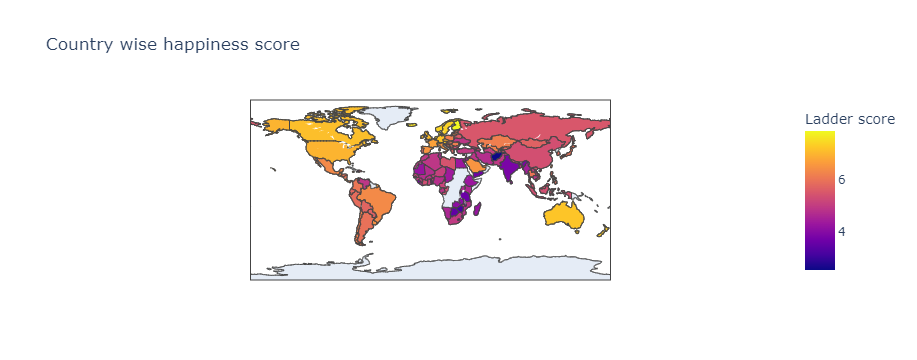

In [36]:
import plotly.express as px
fig = px.choropleth(data_frame=happiness,
                    locations="Country name",
                    locationmode="country names",
                    color="Ladder score",
                    title="Country wise happiness score")
fig.show()

2## Visualization of Data : using Heatmap to visualize the relationships between the ladder score ( happiness score and the other variables)##

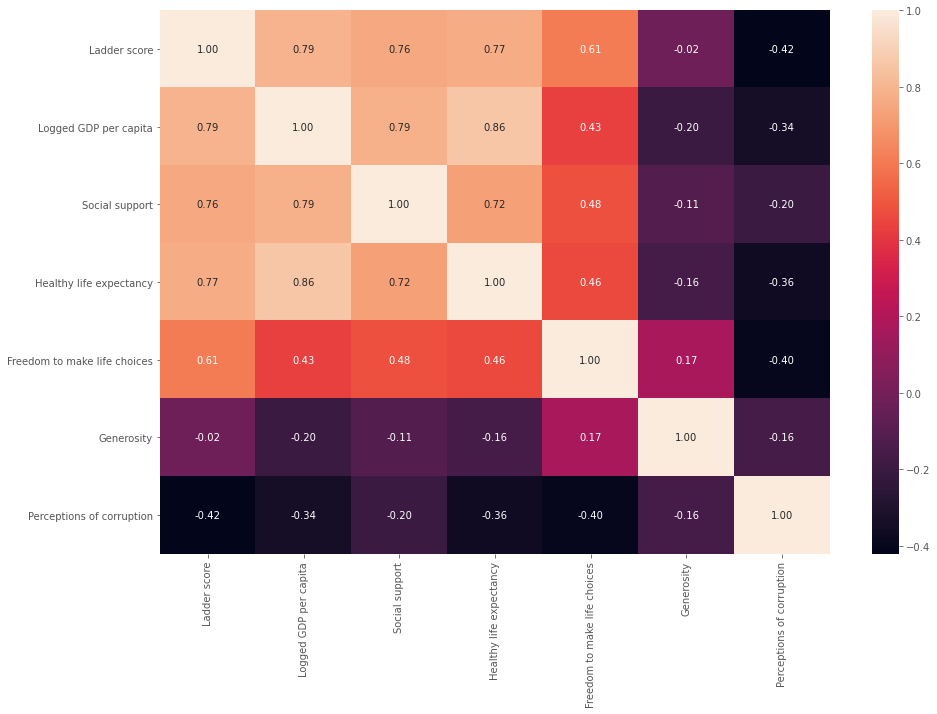

In [37]:
### Selecting which features to Keep or Drop ###
# There is 17 columns , we do not need all information from them 
# using the drop function to select variables to visualise in the heatmap
happiness = happiness.drop(columns=happiness.columns[12:])
happiness = happiness.drop(columns=[ 'upperwhisker', 'lowerwhisker', 'Standard error of ladder score'])

corr = happiness.corr()
f,ax =plt.subplots (figsize=(15,10))
sns.heatmap(corr, annot=True,fmt='.2f', ax=ax);

Looking at the heatmap - the variables that correlate with the happiness score ( closest to 1)  is Socal supports, healthy life expectancy, logged GDP per capta and freedom to make life choices

## 3.Training the Model ##

### 3.1 Selecting which features to Keep or Drop ###

Using the correlation from the above heatmap , we can decide what the target variable can be , which I think is the region rather than the country ( country only appears once). The other variables are ladder score , Socal supports, healthy life expectancy, logged GDP per capta and freedom to make life choices.

In [38]:
happiness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country name                  149 non-null    object 
 1   Regional indicator            149 non-null    object 
 2   Ladder score                  149 non-null    float64
 3   Logged GDP per capita         149 non-null    float64
 4   Social support                149 non-null    float64
 5   Healthy life expectancy       149 non-null    float64
 6   Freedom to make life choices  149 non-null    float64
 7   Generosity                    149 non-null    float64
 8   Perceptions of corruption     149 non-null    float64
dtypes: float64(7), object(2)
memory usage: 10.6+ KB


## 3.2 Exploratory Data Analysis

In [39]:
model_features = happiness.columns.drop(['Regional indicator','Country name'])
model_target = 'Regional indicator'

print('Model features: ', model_features)
print('Model target: ', model_target)

Model features:  Index(['Ladder score', 'Logged GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')
Model target:  Regional indicator


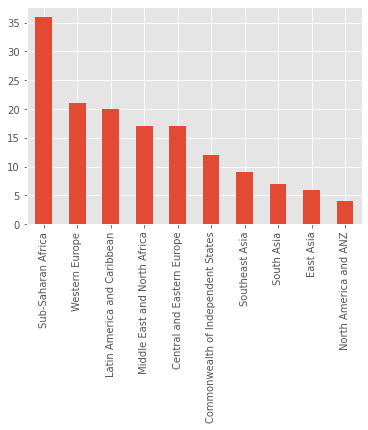

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline

happiness[model_target].value_counts().plot.bar()
plt.show()

#Helps us determine if we are dealing with imbalanced datasets and if down or up-sampling will be required. 

In [41]:
print('Data set shape:', happiness.shape)

print('Class 1 samples in the data set:', sum(happiness[model_target] == 'Western Europe'))
print('Class 2 samples in the data set:', sum(happiness[model_target] == 'North America and ANZ'))
print('Class 3 samples in the data set:', sum(happiness[model_target] == 'Middle East and North Africa'))
print('Class 4 samples in the data set:', sum(happiness[model_target] == 'Latin America and Caribbean'))
print('Class 5 samples in the data set:', sum(happiness[model_target] == 'Central and Eastern Europe'))
print('Class 6 samples in the data set:', sum(happiness[model_target] == 'East Asia'))
print('Class 7 samples in the data set:', sum(happiness[model_target] == 'Southeast Asia'))
print('Class 8 samples in the data set:', sum(happiness[model_target] == 'Commonwealth of Independent States'))
print('Class 9 samples in the data set:', sum(happiness[model_target] == 'Sub-Saharan Africa'))
print('Class 10 samples in the data set:', sum(happiness[model_target] == 'South Asia'))

Data set shape: (149, 9)
Class 1 samples in the data set: 21
Class 2 samples in the data set: 4
Class 3 samples in the data set: 17
Class 4 samples in the data set: 20
Class 5 samples in the data set: 17
Class 6 samples in the data set: 6
Class 7 samples in the data set: 9
Class 8 samples in the data set: 12
Class 9 samples in the data set: 36
Class 10 samples in the data set: 7


## 3.4 Model Training/Fitting ##

Classification example  : 
KNN is a supervised machine learning tool - using data that already has the answers to train its algorithm. it takes a new data point and looks at the existing data points that neighbour it. The new data point is than catergoried according to the majority of the existing neighbouring data points. the key is to determine the number of neighbouts to look at , k . 

In [42]:
# Importing some more packages.

from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [43]:
#MinMaxScaler to scale our input variables from zero to one do that they have similar magnitudes and do not throw off the model. Improves model accuracy
scaler  = MinMaxScaler()

In [44]:
happiness[model_features] = scaler.fit_transform(happiness[model_features])
# Scales the data between 0 and 1. This improves the model accuracy.

In [45]:
#Determining the optimal value of K to use - a rule of thumb is to set K equal to the square root of n, where n is the number of observerations in u data set. 

X_train = happiness[model_features]
y_train = happiness[model_target]

# Trying different values of K in an automated way
K_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12 ,13, 14, 15, 16, 17, 18 , 19, 20]

K_best = 0.0
train_score_best = 0.0
for K in K_values:
    classifier = KNeighborsClassifier(n_neighbors = K)
    classifier.fit(X_train, y_train)
    train_predictions = classifier.predict(X_train)
    train_acc = accuracy_score(y_train, train_predictions)
    print("K=%d, Validation accuracy: %f" % (K, train_acc))
    if train_acc > train_score_best:
        K_best = K
        train_score_best = train_acc
        
print("K_best=%d, Best Validation accuracy: %f" % (K_best, train_score_best))

K=1, Validation accuracy: 1.000000
K=2, Validation accuracy: 0.758389
K=3, Validation accuracy: 0.724832
K=4, Validation accuracy: 0.738255
K=5, Validation accuracy: 0.711409
K=6, Validation accuracy: 0.691275
K=7, Validation accuracy: 0.677852
K=8, Validation accuracy: 0.664430
K=9, Validation accuracy: 0.630872
K=10, Validation accuracy: 0.617450
K=11, Validation accuracy: 0.597315
K=12, Validation accuracy: 0.604027
K=13, Validation accuracy: 0.590604
K=14, Validation accuracy: 0.583893
K=15, Validation accuracy: 0.590604
K=16, Validation accuracy: 0.597315
K=17, Validation accuracy: 0.590604
K=18, Validation accuracy: 0.590604
K=19, Validation accuracy: 0.597315
K=20, Validation accuracy: 0.590604
K_best=1, Best Validation accuracy: 1.000000



What this code does is identify our x and y variables, creates a list of potential K values to iterate through, and then tell us which value of K has the best validation accuracy

The model says a K equal to 1 builds the best model. The problem with setting K equal to 1 though is that it will overfit the model. Using the general rule that K should be near the squareroot of n, it appears that a value of 14 may be the best choice as we see that there is a relative peak there.

## 4. Model Evaluation

Now we can use sklearn to help evaluate our model's accuaracy.

In [46]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score

# Use the fitted model to make predictions on the train dataset
classifier = KNeighborsClassifier(n_neighbors = 14) # optimal number of neighbours
classifier.fit(X_train, y_train)
train_predictions = classifier.predict(X_train)




print('Model performance on the train set:')
print(confusion_matrix(y_train, train_predictions))
print(classification_report(y_train, train_predictions))
print("Train accuracy:", accuracy_score(y_train, train_predictions))

Model performance on the train set:
[[11  0  0  5  0  0  0  0  0  1]
 [ 4  2  0  5  1  0  0  0  0  0]
 [ 2  0  0  1  0  0  0  0  0  3]
 [ 3  0  0 15  1  0  0  0  1  0]
 [ 1  1  0  1 12  0  0  0  1  1]
 [ 0  0  0  0  1  0  0  0  0  3]
 [ 1  1  0  1  0  0  0  0  4  0]
 [ 2  0  0  3  0  0  0  1  2  1]
 [ 0  0  0  1  3  0  0  0 32  0]
 [ 6  0  1  0  0  0  0  0  0 14]]
                                    precision    recall  f1-score   support

        Central and Eastern Europe       0.37      0.65      0.47        17
Commonwealth of Independent States       0.50      0.17      0.25        12
                         East Asia       0.00      0.00      0.00         6
       Latin America and Caribbean       0.47      0.75      0.58        20
      Middle East and North Africa       0.67      0.71      0.69        17
             North America and ANZ       0.00      0.00      0.00         4
                        South Asia       0.00      0.00      0.00         7
                    Sout

## reference 

https://realpython.com/knn-python/

https://towardsdatascience.com/knn-using-scikit-learn-c6bed765be75

https://github.com/kthorson21/KNN_Happy_Index/blob/d5bdcec3ac04a07864275c699bdca579d4903da7/KNN_Happy.ipynb

## The k-Nearest Neighbors (kNN) Algorithm in Python ##

In [47]:
references : https://www.analyticsvidhya.com/blog/2018/08/k-nearest-neighbor-introduction-regression-python/
        

SyntaxError: invalid syntax (<ipython-input-47-2ecc005c8eba>, line 1)

kNN is an example of a supervised machine learning algorithm where we have two types of variables at the same time , a target variable (y) and independent variables (x)
The target variable is what we want to predict and it depends on the independent variables. 
KNN is a non linear learning algorithn - it uses any approach other than a line to separate their cases.

knn as a model can be used for both Classification and Regression : 

Classification - learn how to classify any new observation - target variable is catergorical
Regression - prediction made on numerous independent variables - target variable is numeric


## The Happiness score Problem Statement

The goal is to develop a model that can predict the happiness score base purely on the other independent variables of the dataset by applying kNN to find the closet prediction score as possible


In [ ]:
happiness.columns

In [ ]:
correlation_matrix = happiness.corr()
>>> correlation_matrix["Ladder score"]

In [ ]:
import matplotlib.pyplot as plt
>>> happiness["Ladder score"].hist(bins=20)
>>> plt.show()

## the histogram shows the highest degree of happiness on between 0.3 and 0.8 with a dip at 0.5


In [ ]:
happiness.columns

In [ ]:
happiness_KNN = happiness.columns.drop(['Regional indicator','Country name'])
happiness_KNN

In [48]:
#creating 2 objects that now contain data :x and y . 



x = happiness_KNN.drop(['Ladder score'], axis=1)
y = happiness_KNN['Ladder score']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=12345)


TypeError: drop() got an unexpected keyword argument 'axis'

In [52]:

from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_squared_error
from math import sqrt

from sklearn.neighbors import KNeighborsRegressor
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1

    knn_model = KNeighborsRegressor(n_neighbors=K)

    knn_model.fit(X_train, y_train)
    train_preds = knn_model.predict(X_train)
    mse = mean_squared_error(y_train, train_preds)
    rmse = sqrt(mse)
    rmse_val.append(rmse) #store rmse values
    print('RMSE value for k= ' , K , 'is:', rmse)




TypeError: unsupported operand type(s) for /: 'str' and 'int'

For a very low value of k ( suppose k=1) the model can overfit on the training data , leading to higher error rate on the validation data
but for high value of k , the model can also perform badly, so looking above a the error rates 

In [51]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

NameError: name 'rmse_val' is not defined

In [ ]:
Evaluate the performances on the predictive performances on the test set with the same function as before: 

In [ ]:
rmse_val2 = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    knn_model = KNeighborsRegressor(n_neighbors=K)

    knn_model.fit(X_train, y_train)

    test_preds = knn_model.predict(X_test)
    mse = mean_squared_error(y_test, test_preds)
    rmse = sqrt(mse)
    rmse_val2.append(rmse) #store rmse values
    print('RMSE value for k= ' , K , 'is:', rmse)


In [ ]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val2) #elbow curve 
curve.plot()

In [ ]:
import seaborn as sns
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(X_test[:, 3], X_test[:, 4], c=test_preds, s=50, cmap=cmap)
f.colorbar(points)
plt.show()

In [ ]:
# by changing the c value to y_test , we can check where the above trend observed exists in the actual values of the dataset. 

import seaborn as sns
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(X_test[:, 3], X_test[:, 4], c=y_test, s=50, cmap=cmap)
f.colorbar(points)
plt.show()

## Plotting the Fit of Your Model

To understand what the model has learned , you need to visualise how the predictions have been made using matplotlib: using seaborn package to create a scattor plot of columns in the X_test :looking at life expectancy and social support , which were closely correlated to the ladder score ( happiness score) . We use c = to specifify the size of the points in the scatter plot. 
Each point on the plot is a happiness score and the colour indicates the level of predicted happiness., so the age is on the x axsis and the social is on the y axis . , the higher the social score and lower the age , the higher the happiness score.

In [ ]:
## TUne and Optimize kNN in Python Using scikit-learn

Can I improve the predictive score from the kNN Performances ?

From earlier calculations , we determined that the best K value was 9.

Another way to determine the best value for k is using GridSearchCV : 
    
    



In [50]:
from sklearn.model_selection import GridSearchCV
>>> parameters = {"n_neighbors": range(1, 20)}
>>> gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
>>> gridsearch.fit(X_train, y_train)
GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 20),
                         'weights': ['uniform', 'distance']})

NameError: name 'KNeighborsRegressor' is not defined

In [ ]:
gridsearch.best_params_

In [49]:
train_preds_grid = gridsearch.predict(X_train)
>>> train_mse = mean_squared_error(y_train, train_preds_grid)
>>> train_rmse = sqrt(train_mse)
>>> test_preds_grid = gridsearch.predict(X_test)
>>> test_mse = mean_squared_error(y_test, test_preds_grid)
>>> test_rmse = sqrt(test_mse)
train_rmse


NameError: name 'gridsearch' is not defined

In [ ]:
test_rmse

## Adding Weighted Average of Neighbors Based on Distance
Below, you’ll test whether the performance of your model will be any better when predicting using a weighted average instead of a regular average. This means that neighbors that are further away will less strongly influence the prediction.

You can do this by setting the weights hyperparameter to the value of "distance". However, setting this weighted average could have an impact on the optimal value of k. Therefore, you’ll again use GridSearchCV to tell you which type of averaging you should use:

In [ ]:
parameters = { "n_neighbors": range(1, 20), "weights": ["uniform", "distance"]}
gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
gridsearch.fit(X_train, y_train)
gridsearch.best_params_
est_preds_grid = gridsearch.predict(X_test)
test_mse = mean_squared_error(y_test, test_preds_grid)
test_rmse = sqrt(test_mse)
test_rmse

In [ ]:
best_k = gridsearch.best_params_["n_neighbors"]
best_weights = gridsearch.best_params_["weights"]
bagged_knn = KNeighborsRegressor( n_neighbors=best_k, weights=best_weights)



## Further Improving on kNN in scikit-learn With Bagging

As a third step for kNN tuning, you can use bagging. Bagging is an ensemble method, or a method that takes a relatively straightforward machine learning model and fits a large number of those models with slight variations in each fit. Bagging often uses decision trees, but kNN works perfectly as well.

Ensemble methods are often more performant than single models. One model can be wrong from time to time, but the average of a hundred models should be wrong less often. The errors of different individual models are likely to average each other out, and the resulting prediction will be less variable.

You can use scikit-learn to apply bagging to your kNN regression using the following steps. First, create the KNeighborsRegressor with the best choices for k and weights that you got from GridSearchCV:

In [ ]:
from sklearn.ensemble import BaggingRegressor
bagging_model = BaggingRegressor(bagged_knn, n_estimators=100).fit(X_train, y_train)
test_preds_grid = bagging_model.predict(X_test)
test_mse = mean_squared_error(y_test, test_preds_grid)
test_rmse = sqrt(test_mse)
test_rmse                               
                                 

In [ ]:
Conclusions : 
    
Predictive performance of the algorithm : 
    
    Model                             Prediction Error
    Arbitrary                         0.10990596140389282  
    GridsearchCV for k                0.10990596140389282     
    GridserchCV for k and weights     0.10982958342586754
    Bagging and GridsearchCV          0.1105449377296301
    

There isnt alot of differences in the errors achieved by tuning and optimizing kNN .Applying an weighted average only slighly reduced the prediction error.  

## Linear REgression

In [ ]:
ref https://www.kaggle.com/hafidzjnp/model-machine-learning-to-predict-happiness

In [54]:
import sklearn.datasets as datasets
import sklearn.preprocessing as preprocessing
import sklearn.model_selection as model_selection
import sklearn.metrics as metrics
import sklearn.linear_model as linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import max_error


# import statistic library
from scipy import stats
import statsmodels.api as sm


lm= linear_model.LinearRegression()

In [55]:
lm.fit(X_train, y_train)

ValueError: could not convert string to float: 'Western Europe'

In [56]:
print('Coefficients:\n Social support, Healthy life, Freedom, Generosity, Perceptions of corruption \n',lm.coef_)
print('Intercept:',lm.intercept_)

AttributeError: 'LinearRegression' object has no attribute 'coef_'

In [57]:
y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)
target_array_pred = lm.predict(x)

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
# check the prediction data & real data
print('Real Data')
print(y_test[:10])
print('\n Predicted Data')
print(y_test_pred[:10])
print('\n Diff')
print(y_test[:10]-y_test_pred[:10])


In [ ]:
#cek linearity
plt.scatter(y_test,y_test_pred)
plt.xlabel('Real data')
plt.ylabel('predicted data')
plt.title('Relationshio between predictor and real data')
plt.show()

In [ ]:
# check distribution from residual using visual
sns.distplot(y_test - y_test_pred)
plt.title('Residuals', size=18)

In [ ]:
# check distribution from residual
residual = (y_test - y_test_pred)
sw = stats.shapiro(residual)
ks = stats.kstest(residual, 'norm')

print('Shapiro-Wilk test ---- statistic: {}, p-value: {}'.format(sw[0],sw[1]))
print('Kolmogorov-Smirnov test ---- statistic: {}, p-value: {}'.format(ks.statistic,ks.pvalue))

In [ ]:
# evaluate regression model - R squared
print('R^2 score:',lm.score(X_train, y_train))

In [ ]:
# evaluate regression model - RMSE
rmse_training = mean_squared_error(y_true=y_train,y_pred=y_train_pred,squared=False)
rmse_test = mean_squared_error(y_true=y_test,y_pred=y_test_pred,squared=False)

print('RMSE Training Data: {}'.format(rmse_training))
print('RMSE Test Data: {}'.format(rmse_test))

In [ ]:
# compare performance between model
list_model = [['Ridge',linear_model.Ridge()],['Lasso',linear_model.Lasso()],['LassoLars',linear_model.LassoLars()],['BayessianRidge',linear_model.BayesianRidge()]]
performance_result = {}

for model_name,regression_model in list_model:
  regression_model.fit(X_train, y_train)
  y_train_pred = regression_model.predict(X_train)
  y_test_pred = regression_model.predict(X_test)

  rmse_training = mean_squared_error(y_true=y_train,y_pred=y_train_pred,squared=False)
  rmse_test = mean_squared_error(y_true=y_test,y_pred=y_test_pred,squared=False)

  r_score = regression_model.score(X_train, y_train)

  performance_result[model_name]={'training':rmse_training,'test':rmse_test,'R^2 score':r_score}

performance_result

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from seaborn import heatmap
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import plotly.express as px
from matplotlib import rcParams
import seaborn as sns
from sklearn.model_selection import KFold
%matplotlib inline


In [ ]:
dtr= DecisionTreeRegressor()
dtr.fit(X_train,y_train)
y_pred = dtr.predict(X_test)
test_mse = mean_squared_error(y_test, y_pred)
y_pred_train = dtr.predict(X_train)
train_mse = mean_squared_error(y_train, y_pred_train)
# d=dtr.score(X_test, y_test)
score = r2_score(y_test, y_pred)
score, test_mse 


# Plot the results
plt.figure()
plt.scatter(y_test,y_test_pred, s=20, edgecolor="black", c="darkorange", label="data")
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

In [ ]:
rf = RandomForestRegressor(n_estimators = 13579)
rf.fit(X_train, y_train)
y_hat = rf.predict(X_test)
errors = abs(y_hat - y_test)
acc = 1 - errors
# c=rf.score(X_test, y_test)
score = r2_score(y_test, y_pred)
score, np.mean(acc)


# Plot the results
plt.figure()
plt.scatter(y_test,y_test_pred, s=20, edgecolor="black", c="darkorange", label="data")
plt.xlabel("data")
plt.ylabel("target")
plt.title("RandomForestRegressor")
plt.legend()
plt.show()

CLustering : the world happiness report 

Aims : 

- We will train an unsupervised machine learning algorithm know as k means clustering to cluster countries based on features such as economic production , social suppport , life expectancy , freedom , absense of corruption and generosity
- The world happiness report determines the state of global happiness
- the happiness scores and rankings data hasbeen collected by asking individuals to rank their life from 0 ( worst case ) to 10 ( best case) 


In [ ]:
import pandas as pd # excel type in python for dataframes
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
import plotly.express as px
import plotly.graph_objects as go
from chart_studio.plotly import plot, iplot
from plotly.offline import iplot

In [ ]:
# getting the required dependencies 
# Press shift and enter will execute the cell

!pip install bubbly
!pip install iplot
!pip install chart_studio

## PERFORMING EXPLORATRORY ANALYSIS

In [ ]:
len( happiness)

In [ ]:

#using a filter to locate information on irelands happiness
happiness[happiness['Country name']== 'Ireland']

In [ ]:
# Check the number of non-null values in the dataframe 
happiness.info()


In [ ]:
# check the null values
happiness.isnull().sum()

## PERFORM DATA VISUALIZATION 

In [ ]:
## plotting the pair plot 

fig=plt.figure(figsize = (20,20))
sns.pairplot(happiness[['Ladder score','Logged GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption']])
             

In [ ]:
#printout the displot - distribution plot 
#displot combines the matplotlib.hist function with seaborn kdeplot() for each of the interested columns using a for loop to create these subplots

columns = ['Ladder score','Logged GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption']
plt.figure(figsize = (20, 50))
for i in range(len(columns)):
  plt.subplot(8, 2, i+1)
  sns.distplot(happiness[columns[i]], color = 'r');
  plt.title(columns[i])

plt.tight_layout()

In [ ]:
corr_matrix = happiness.corr()
corr_matrix

sns.heatmap(corr_matrix,annot = True)

In [ ]:
# Plot the relationship between score, GDP and country
fig = px.scatter(happiness, x = 'Logged GDP per capita', y = 'Ladder score', text = 'Country name', color = 'Country name', trendline = "ols")
fig.update_layout ( title_text = 'Ladder score vs GDP per Capita')

fig.show()


In [ ]:
# Plot the relationship between score, GDP and country
fig = px.scatter(happiness, x = 'Freedom to make life choices', y = 'Ladder score', text = 'Country name', color = 'Country name', trendline = "ols")
fig.update_layout ( title_text = 'Ladder score vs Freedom to make life choices')


fig.show()

In [ ]:
# Plot the relationship between score, GDP and country
fig = px.scatter(happiness, x = 'Healthy life expectancy', y = 'Ladder score', color = 'Country name', trendline = "ols", hover_name = "Country name")
fig.update_layout ( title_text = 'Ladder score vs Healthy life expectancy')


fig.show()

TASK #6: PREPARE THE DATA TO FEED THE CLUSTERING MODELÂ¶

In [ ]:
# We are going to create clusters without the use of happiness score and rank to see which countries fall under similar clusters
# Select the data without rank and happiness score

df_happiness = happiness.drop(columns = ['Country name', 'Regional indicator', 'Ladder score', 'Standard error of ladder score','upperwhisker','lowerwhisker','Ladder score in Dystopia','Explained by: Log GDP per capita','Explained by: Social support','Explained by: Healthy life expectancy','Explained by: Freedom to make life choices','Explained by: Generosity','Explained by: Perceptions of corruption','Dystopia + residual'])
df_happiness


In [ ]:
#Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_happiness)

In [ ]:
scaled_data.shape

## Understand the Theory and intuition behind k-means clustering algorithm

In [ ]:
scores = []
range_values = range(1,20)

for i in range_values:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(scaled_data)
    scores.append(kmeans.inertia_)
    


plt.plot(scores, 'bx-')
plt.title('Finding right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('scores') 
plt.show()

In [ ]:
kmeans = KMeans(3)
kmeans.fit(scaled_data)

In [ ]:
labels = kmeans.labels_

In [ ]:
kmeans.cluster_centers_.shape

In [ ]:
kmeans.cluster_centers_

In [ ]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [df_happiness.columns])
cluster_centers      

In [ ]:
# In order to understand what these numbers mean, let's perform inverse transformation
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [df_happiness.columns])
cluster_centers


Cluster 0: countries that have GDP in the range of 0.6 to 1.4 and have high social support. These countries have medium life expectancy and have high freedom to make life choices. These counties have low generosity and low perception of corruption.

Cluster 1: countries that have very high GDP, high social support and high life expectancy. These counties have high freedom to make life choices, medium generosity and medium perception of corruption.

Cluster 2: countries that have low GDP average life expectancy and average social support. These counties have low freedom to make life choices, high generosity and medium perception of corruption.

In [ ]:
labels.shape # Labels associated to each data point

In [ ]:
labels.max()

In [ ]:
labels.min()

In [ ]:
y_kmeans = kmeans.fit_predict(scaled_data)
y_kmeans


In [ ]:
# concatenate the clusters labels to our original dataframe
happy_df_cluster = pd.concat([happiness, pd.DataFrame({'cluster':labels})], axis = 1)
happy_df_cluster

In [ ]:
# Plot the histogram of various clusters
for i in df_happiness.columns:
  plt.figure(figsize = (35, 10))
  for j in range(3):
    plt.subplot(1,3,j+1)
    cluster = happy_df_cluster[happy_df_cluster['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{}    \nCluster {} '.format(i, j))
  
  plt.show()



VISUALIZE THE CLUSTERSÂ¶

In [ ]:
# Plot the relationship between cluster and score 

fig = px.scatter(happy_df_cluster, x = 'cluster', y = "Ladder score",
            color = "Regional indicator", hover_name = "Regional indicator")
          

fig.update_layout(
    title_text = 'Happiness Score vs Cluster'
)
fig.show()

In [ ]:
# Plot the relationship between cluster and GDP

fig = px.scatter(happy_df_cluster, x='cluster', y='Logged GDP per capita',
            color = "Regional indicator", hover_name = "Regional indicator")
       

fig.update_layout(
    title_text='GDP vs Clusters'
)
fig.show()

In [ ]:
# Visaulizing the clusters with respect to economy, corruption, gdp, rank and their scores

from bubbly.bubbly import bubbleplot

figure = bubbleplot(dataset=happy_df_cluster, 
    x_column='Logged GDP per capita', y_column='Perceptions of corruption', bubble_column='Regional indicator',  
    color_column='cluster', z_column='Healthy life expectancy', size_column='Ladder score',
    x_title="Logged GDP per capita", y_title="Corruption", z_title="Life Expectacy",
    title='Clusters based Impact of Economy, Corruption and Life expectancy on Happiness Scores of Nations',
    colorbar_title='Cluster', marker_opacity=1, colorscale='Portland',
    scale_bubble=0.8, height=650)

iplot(figure, config={'scrollzoom': True})

In [ ]:
# Visualizing the clusters geographically
data = dict(type = 'choropleth', 
           locations = happy_df_cluster["Country name"],
           locationmode = 'country names',
           colorscale='RdYlGn',
           z = happy_df_cluster['cluster'], 
           text = happy_df_cluster["Regional indicator"],
           colorbar = {'title':'Clusters'})

layout = dict(title = 'Geographical Visualization of Clusters', 
              geo = dict(showframe = True, projection = {'type': 'azimuthal equal area'}))

choromap3 = go.Figure(data = [data], layout=layout)
iplot(choromap3)